In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_settings_v3 import *
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('athlete_events.csv')

## Selecciono sólo juegos olímpicos posteriores a 1950
df = df[df.Year>1950]

## Selecciono los deportes de interés
deportes = ['Gymnastics', 'Basketball']
df = df[df['Sport'].isin(deportes)]

## Descarto valores nulos
df = df.dropna()

## Columnas de interés
cols = ['Age', 'Height', 'Weight', 'Sport']
df = df[cols]
df.head()

,Age,Height,Weight,Sport
50,32.0,175.0,64.0,Gymnastics
609,23.0,202.0,104.0,Basketball
677,19.0,160.0,48.0,Gymnastics
789,19.0,161.0,62.0,Gymnastics
790,19.0,161.0,62.0,Gymnastics


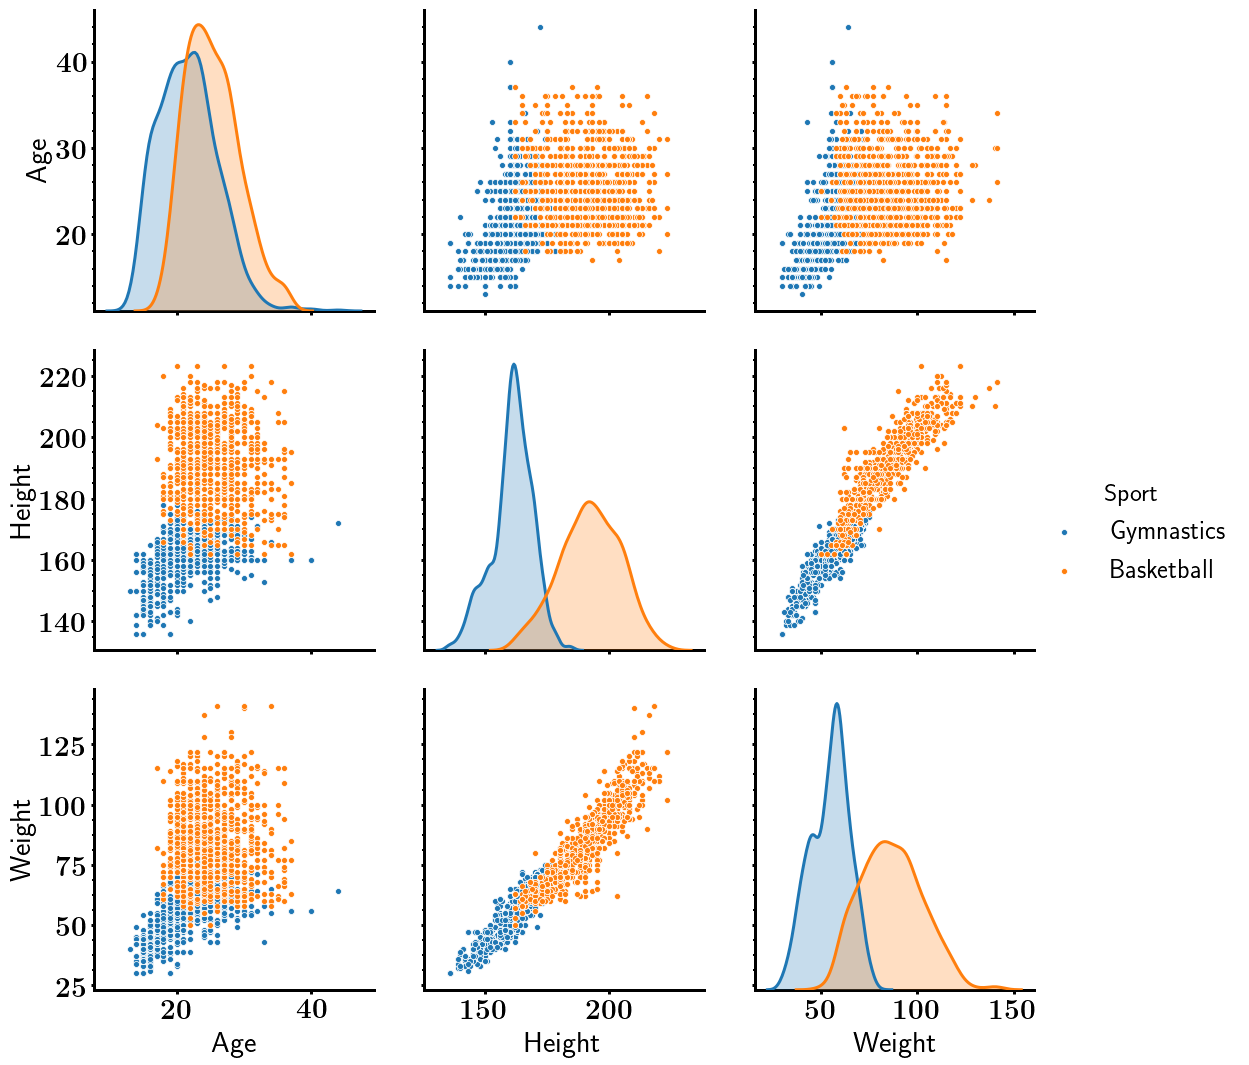

In [3]:
sns.pairplot(df, hue='Sport', height=5);

In [13]:
## Construyo matriz de features
features = df[['Age', 'Height', 'Weight']]

## Estandarizo varables
#features = (features - features.mean()) / features.std()
features = features.values

## Construyo vector de targets (con valor numérico)
targets = df['Sport'].values
d = {'Gymnastics': 0, 'Basketball': 1}
targets = np.array([d[t] for t in targets])

In [14]:
def precision(yPred, yTest):
    N = len(yTest)
    return (yPred == yTest).sum() / N

## Separo conjunto de entrenamiento y conjunto de prueba
xTrain, xTest, yTrain, yTest = train_test_split(features, targets, test_size=0.2, random_state=0)

## Inicializo clasificador
classifier = KMeans(n_clusters=2, random_state=2)

## Entreno
kmeans = classifier.fit(xTrain)

## Centros de los clusters
centers = kmeans.cluster_centers_

## Realizo predicción sobre conjunto de prueba
yPred = kmeans.predict(xTest)

## Evaluo la precision del clasificador
print('Porcentaje bien clasificado: {:.2f}%'.format(100*precision(yPred, yTest)))

Porcentaje bien clasificado: 91.17%


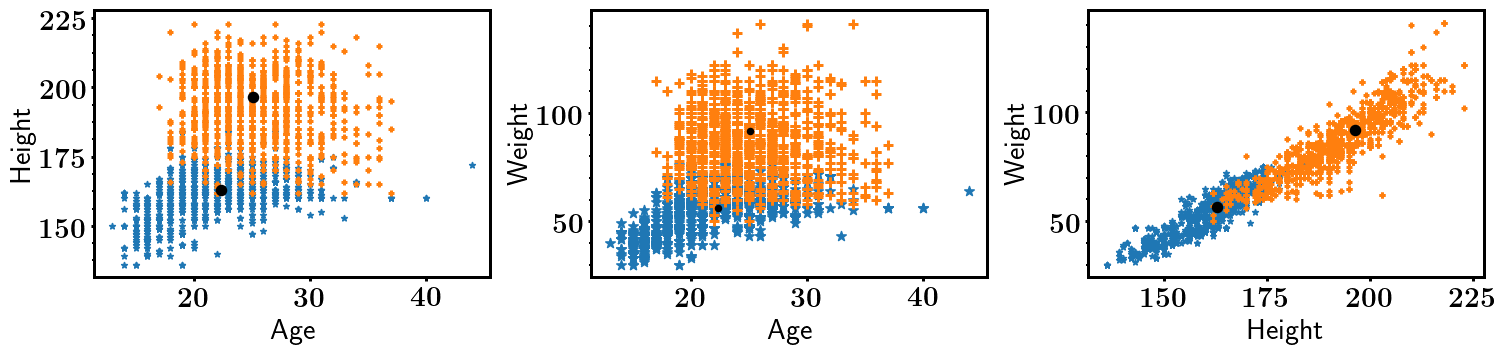

In [15]:
gym = df.Sport == 'Gymnastics'

ncols = 3
nrows = 1
fig, axes = plt.subplots(figsize=(7*ncols, 5*nrows), ncols=3, nrows=1)

ax = axes[0]
ax.scatter(df[gym].Age, df[gym].Height, marker='*')
ax.scatter(df[~gym].Age, df[~gym].Height, marker='+')
ax.scatter(centers[0][0], centers[0][1], color='k', s=100)
ax.scatter(centers[1][0], centers[1][1], color='k', s=100)
ax.set_xlabel('Age')
ax.set_ylabel('Height')

ax = axes[1]
ax.scatter(df[gym].Age, df[gym].Weight, s=100, marker='*')
ax.scatter(df[~gym].Age, df[~gym].Weight, s=100, marker='+')
ax.scatter(centers[0][0], centers[0][2], color='k')
ax.scatter(centers[1][0], centers[1][2], color='k')
ax.set_xlabel('Age')
ax.set_ylabel('Weight')

ax = axes[2]
ax.scatter(df[gym].Height, df[gym].Weight, marker='*')
ax.scatter(df[~gym].Height, df[~gym].Weight, marker='+')
ax.scatter(centers[0][1], centers[0][2], color='k', s=100)
ax.scatter(centers[1][1], centers[1][2], color='k', s=100)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')

plt.tight_layout()
plt.show()